# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


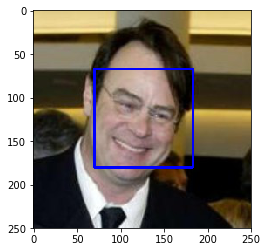

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
- Percentage of the first 100 images in `human_files` with a detected human face: 98%
- Percentage of the first 100 images in `dog_files` with a detected human face: 17%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_in_human_files_detected = [face_detector(i) for i in human_files_short]
human_in_dog_files_detected   = [face_detector(i) for i in dog_files_short]

percentage = sum(human_in_human_files_detected)
print("Percentage of the first 100 images in human_files with a detected human face: " + str(percentage) + "%")
percentage = sum(human_in_dog_files_detected)
print("Percentage of the first 100 images in dog_files with a detected human face: " + str(percentage) + "%")

Percentage of the first 100 images in human_files with a detected human face: 98%
Percentage of the first 100 images in dog_files with a detected human face: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 100726314.16it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Define a few variables
normalization_mean = [0.485, 0.456, 0.406]   # Sequence of means for each channel
normalization_std  = [0.229, 0.224, 0.225]   # Sequence of standard deviations for each channel

input_image_size   = 224                     # = H x W

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    
    # 1. Load the image into a pillow (PIL) Image.
    img_pil = Image.open(img_path)
    
    # 2. The pre-trained model expect its input image to be normalized in the same way,
    #    i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W
    #    are expected to be at least 224
    preprocess = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(input_image_size),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=normalization_mean, std=normalization_std)])
    img_tensor = preprocess(img_pil)      # 3D tensor with shape (channels, rows, columns), i.e. (3, 224, 224)
    
    # 3. Since pre-trained model expects a 4D tensor as input, we need to resize the 3D image to a 4D tensor
    img_tensor = img_tensor.unsqueeze(0)  # 4D tensor with shape (nb_samples, channels, rows, columns), i.e. (1, 3, 224, 224)
    
    # 4. Move tensor to GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    ## Return the *index* of the predicted class for that image

    # 1. Set the VGG16 model to 'evaluation' mode
    VGG16.eval()
    
    # 2. Run the image through the VGG16 model
    predict = VGG16(img_tensor)
    
    # 3. The 'argmax' function is used to return the index of the maximum value of a tensor
    #    The 'item' function is used to return the value of this tensor as a standard Python number.
    index = torch.argmax(predict).item()
    
    # 4. Set the VGG16 model to back to 'training' mode
    VGG16.train()
    
    return index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx_low  = 151     # 'Chihuahua'
    idx_high = 268+1   # 'Mexican hairless' (inclusive)
    
    return (VGG16_predict(img_path) in range(idx_low, idx_high))   # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- Percentage of the images in `human_files_short` with a detected dog: 0%
- Percentage of the images in `dog_files_short` with a detected dog: 100%

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_in_human_files_detected = [dog_detector(i) for i in human_files_short]
dog_in_dog_files_detected   = [dog_detector(i) for i in dog_files_short]

percentage = sum(dog_in_human_files_detected)
print("Percentage of the images in human_files_short where a dog was detected: " + str(percentage) + "%")
percentage = sum(dog_in_dog_files_detected)
print("Percentage of the images in dog_files_short where a dog was detected: " + str(percentage) + "%")

Percentage of the images in human_files_short where a dog was detected: 0%
Percentage of the images in dog_files_short where a dog was detected: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# 1.1 Define the data augmentation and normalization for training purpose
train_transforms = transforms.Compose([transforms.RandomRotation(25),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# 1.2 Define the data normalization for validation and testing purposes
other_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# 2.1 Load the 'training,' 'validation' and 'testing' datasets with normalized data
data_dir      = '/data/dog_images'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=other_transforms)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=other_transforms)

# 2.2 Create the 'training,' 'validation' and 'testing' dataloaders that will allow us to iterate the datasest' contents
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=0)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- Since we have been taught that all pre-trained CNN models expect their images' sizes to be at least 224 by 224, I decided to set the sizes of my input images to 224 by 224. But first, following the PyTorch tutorials, the non-training images had to be resized to a given size of 256 to make them more uniform.
- Since data augmentation is an easy and convenient way to increase the amount of data available during the training prerios of the model, I have decided to augment my data by randomly flipping horizontally certain images as well as randomly rotating certain images by a 25° angle.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(  3,  64, kernel_size=3, padding=1)  # input: 224 x 224 x   3; output: 224 x 224 x  64
        self.conv2 = nn.Conv2d( 64, 128, kernel_size=3, padding=1)  # input: 112 x 112 x  64; output: 112 x 112 x 128
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # input:  56 x  56 x 128; output:  56 x  56 x 256
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)  # input:  28 x  28 x 256; output:  28 x  28 x 512
        self.conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)  # input:  14 x  14 x 512; output:  14 x  14 x 512

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(7*7*512, 1024)
        self.fc2 = nn.Linear(   1024, 1024)
        # While looking at the dictionary, one will notice that the categories corresponding to dogs appear
        # in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive (269-151 = 118)
        self.fc3 = nn.Linear(   1024, 133)    # There are 133 distinct breeds of dogs

        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))  # input: 224 x 224 x  64; output: 112 x 112 x 128 
        x = self.pool(F.relu(self.conv2(x)))  # input: 112 x 112 x 128; output:  56 x  56 x 256
        x = self.pool(F.relu(self.conv3(x)))  # input:  56 x  56 x 256; output:  28 x  28 x 512
        x = self.pool(F.relu(self.conv4(x)))  # input:  28 x  28 x 512; output:  14 x  14 x 512
        x = self.pool(F.relu(self.conv5(x)))  # input:  14 x  14 x 512; output:   7 x   7 x 512
        
        x = x.view(-1, 7*7*512)               # flatten output (above) to a 1 x 1 x 25088 vector
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

To implement my CNN architecture, I took inspiration from the VGG16 architecture described in an article written in 1995 by Karen Simonyan and Andrew Zisserman: "[VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION](https://arxiv.org/pdf/1409.1556.pdf)."

I loosely based my architecture on the simplest version of the VGG16 model described in the paper.

I decided to use five convolutional layers. Each convolutional layer has a 'kernel size' of 3 and a 'padding' of 1 and its purpose is to keep the width and height of the input image identical but expands the number of its feature maps.

In between each convolutional layer, I applied a 'MaxPool2d' pooling layer with a 'kernel size' of 2 and a 'stride' of 2. The purpose of these pooling layers is to decrease the width and height of the input image by 50% without affecting its feature maps.

Once the original input image passes through the five convolutional layers and their respective pooling layers, we are left with a 7 by 7 image with 512 feature maps.

In order to feed this output into the first of my three fully connected layers, the output has to be flattened into a vector of length 25,088 (7 * 7 * 512).

Since we only 133 breeds of dogs to consider for our classification purpose, the size of the output for the last fully connected layer is set to 133.

Finally, it should be noted that I did not apply a softmax function to the last fully connected layer since this function will applied within the loss function chosen for my model.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [15]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # 1. clear the gradients of all optimized variables
            optimizer.zero_grad()
            # 2. forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # 3. calculate the loss
            loss = criterion(output, target)
            # 4. backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # 5. perform a single optimization step (parameter update)
            optimizer.step()
            # 6. record the average training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss

            # 1. forward pass: compute predicted outputs by passing inputs to the model
            with torch.no_grad():
                output = model(data)
            # 2. calculate the loss
            loss = criterion(output, target)
            # 3. record the average validation loss
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Better validation loss ({:.6f} --> {:.6f}). Saving the model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss            
            
    # return trained model
    return model

# define the data loaders
loaders_scratch = {'train': train_loader,
                   'valid': valid_loader,
                   'test':  test_loader}

# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.887694 	Validation Loss: 4.882566
Better validation loss (inf --> 4.882566). Saving the model...
Epoch: 2 	Training Loss: 4.875009 	Validation Loss: 4.866607
Better validation loss (4.882566 --> 4.866607). Saving the model...
Epoch: 3 	Training Loss: 4.852948 	Validation Loss: 4.810450
Better validation loss (4.866607 --> 4.810450). Saving the model...
Epoch: 4 	Training Loss: 4.814215 	Validation Loss: 4.744359
Better validation loss (4.810450 --> 4.744359). Saving the model...
Epoch: 5 	Training Loss: 4.761878 	Validation Loss: 4.660398
Better validation loss (4.744359 --> 4.660398). Saving the model...
Epoch: 6 	Training Loss: 4.721474 	Validation Loss: 4.636159
Better validation loss (4.660398 --> 4.636159). Saving the model...
Epoch: 7 	Training Loss: 4.684773 	Validation Loss: 4.709486
Epoch: 8 	Training Loss: 4.660061 	Validation Loss: 4.576169
Better validation loss (4.636159 --> 4.576169). Saving the model...
Epoch: 9 	Training Loss: 4.613124 	Valida

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.983958


Test Accuracy: 24% (207/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
## TODO: Specify data loaders

# 1.1 Define the data augmentation and normalization for training purpose
train_transforms = transforms.Compose([transforms.RandomRotation(25),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# 1.2 Define the data normalization for validation and testing purposes
other_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

#2.1 Load the 'training,' 'validation' and 'testing' datasets with normalized data
data_dir      = '/data/dog_images'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=other_transforms)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=other_transforms)

#2.2 Create the 'training,' 'validation' and 'testing' dataloaders that will allow us to iterate the datasest' contents
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=0)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
## TODO: Specify model architecture 

# 1. define VGG16 model
model_transfer = models.vgg16(pretrained=True)

# 2. check if CUDA is available
use_cuda = torch.cuda.is_available()

# 3. in order to prevent the updating of the model's parameters during the
#    backpropagation process, the model's parameters should be frozen
for param in model_transfer.parameters():
    param.requires_grad = False

# 4. define a new version of the model's classifier
new_classifier = nn.Sequential(    
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 133))

# 5. replace the model's classifier with the new one defined above (#4.)
model_transfer.classifier = new_classifier

# move model to GPU if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

In order to use transfer learning to create a CNN to classify dog breeds, one must choose a pre-trained model. In my case, I went with a VGG16 model since it was trained to solve a problem similar to the one that I want to solve.

A typical CNN is made up of two parts:
- a convolutional base used to extract features from an image;
- a classifier used to classify the image based on the detected features.

Since the VGG16 model was trained on a very large quantity of images (including dogs), its convolutional base is well suited for our end game. As a result, I have decided to keep its convolutional base intact by 'freezing' its weights. Furthermore, I kept the architecture of the original classifier but I modified the number of output features. In particular, I set the output feature of its last fully connected layer to 133 since I only have to consider 133 potential classifications rather than the original 1000.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [19]:
# select loss function
criterion_transfer = nn.CrossEntropyLoss()

# select optimizer
# WARNING: Since the model's parameters are frozen, only its classifier should be optimized
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.05) 

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # 1. clear the gradients of all optimized variables
            optimizer.zero_grad()
            # 2. forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # 3. calculate the loss
            loss = criterion(output, target)
            # 4. backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # 5. perform a single optimization step (parameter update)
            optimizer.step()
            # 6. record the average training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss

            # 1. forward pass: compute predicted outputs by passing inputs to the model
            with torch.no_grad():
                output = model(data)
            # 2. calculate the loss
            loss = criterion(output, target)
            # 3. record the average validation loss
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Better validation loss ({:.6f} --> {:.6f}). Saving the model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss            
            
    # return trained model
    return model

In [22]:
# define the data loaders
loaders_transfer = {'train': train_loader,
                    'valid': valid_loader,
                    'test':  test_loader}

# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.598794 	Validation Loss: 1.957467
Better validation loss (inf --> 1.957467). Saving the model...
Epoch: 2 	Training Loss: 2.373253 	Validation Loss: 1.426282
Better validation loss (1.957467 --> 1.426282). Saving the model...
Epoch: 3 	Training Loss: 2.127352 	Validation Loss: 1.312032
Better validation loss (1.426282 --> 1.312032). Saving the model...
Epoch: 4 	Training Loss: 2.033534 	Validation Loss: 1.001482
Better validation loss (1.312032 --> 1.001482). Saving the model...
Epoch: 5 	Training Loss: 1.973983 	Validation Loss: 0.999490
Better validation loss (1.001482 --> 0.999490). Saving the model...
Epoch: 6 	Training Loss: 1.957626 	Validation Loss: 1.051049
Epoch: 7 	Training Loss: 1.942560 	Validation Loss: 0.995056
Better validation loss (0.999490 --> 0.995056). Saving the model...
Epoch: 8 	Training Loss: 1.872436 	Validation Loss: 1.004099
Epoch: 9 	Training Loss: 1.925729 	Validation Loss: 0.997939
Epoch: 10 	Training Loss: 1.868716 	Validation L

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.981330


Test Accuracy: 72% (609/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [24]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

# load the 'transfer' model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


def predict_breed_transfer(img_path):    
    # load the image and return the predicted breed
    
    # 1. Load the image into a pillow (PIL) Image.
    img_pil = Image.open(img_path)
    
    # 2. The pre-trained model expect its input image to be normalized in the same way,
    #    i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W
    #    are expected to be at least 224
    preprocess = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(input_image_size),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=normalization_mean, std=normalization_std)])
    img_tensor = preprocess(img_pil)      # 3D tensor with shape (channels, rows, columns), i.e. (3, 224, 224)
    
    # 3. Since pre-trained model expects a 4D tensor as input, we need to resize the 3D image to a 4D tensor
    img_tensor = img_tensor.unsqueeze(0)  # 4D tensor with shape (nb_samples, channels, rows, columns), i.e. (1, 3, 224, 224)
    
    # 4. Move tensor to GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    ## Return the *index* of the predicted class for that image

    # 1. Set the 'transfer' model to 'evaluation' mode
    model_transfer.eval()
    
    # 2. Run the image through the 'transfer' model
    with torch.no_grad():
        predict = model_transfer(img_tensor)
    
    # 3. The 'argmax' function is used to return the index of the maximum value of a tensor
    #    The 'item' function is used to return the value of this tensor as a standard Python number.
    breed_idx = torch.argmax(predict).item()
    
    # 4. Set the 'transfer' model to back to 'training' mode
    model_transfer.train()
    
    return class_names[breed_idx] # predicted breed based on its index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [25]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    # 1. Has a human face been detected?
    if face_detector(img_path):           # yes, a human face was detected
        breed_prediction = predict_breed_transfer(img_path)
        print('Hello, it appears that you are human!')
        plt.imshow(Image.open(img_path))
        plt.show()
        print('If you were a dog, you would be a ' + breed_prediction + '!')
        print('\n     -----     \n')
    # 2. Has dog been detected?
    elif dog_detector(img_path):          # yes, a dog has been detected
        breed_prediction = predict_breed_transfer(img_path)
        print('Hello, it appears that you are a ' + breed_prediction + '!')
        plt.imshow(Image.open(img_path))
        plt.show()
        print('\n     -----     \n')
    # 3. If neither a human face nor a dog has been detected
    else:
        print('Unfortunately, neither a human nor a dog could be detected!')
        plt.imshow(Image.open(img_path))
        plt.show()
        print('\n     -----     \n')        

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The ouput is better than my expectations. I am actually quite surprise at how good the algorithm was at distinguishing between human and dogs. Even the actual dog breed classification appears to be working fairly well. At least from the point of view of someone with limited knowledge in regards to dog breeds.

What could be done to improve my algorithm?
- the `face_detector` function could potentially be improved if it was based on transfer learning;
- the `dog_detector` function also could potentially be improved if it was based on transfer learning;
- because of the complexity of distinguishing between dog breeds that look fairly similar, the model used by the `predict_breed_transfer` function could be further refined by unfreezing some of the weights attached to its convolutional layers. This would result in more layers beeing trained to the new goal.

Hello, it appears that you are human!


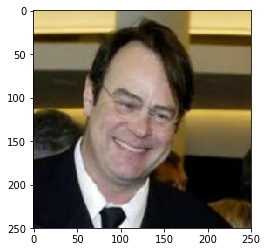

If you were a dog, you would be a American staffordshire terrier!

     -----     

Hello, it appears that you are human!


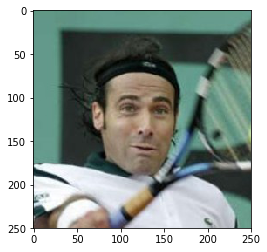

If you were a dog, you would be a Australian cattle dog!

     -----     

Hello, it appears that you are human!


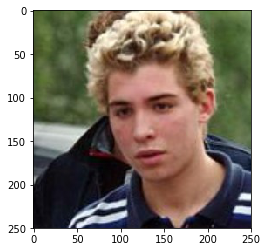

If you were a dog, you would be a Bullmastiff!

     -----     

Hello, it appears that you are a Mastiff!


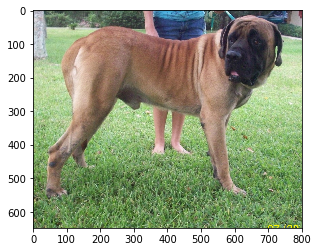


     -----     

Hello, it appears that you are a Bullmastiff!


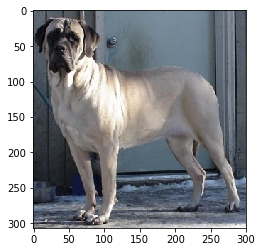


     -----     

Hello, it appears that you are a Mastiff!


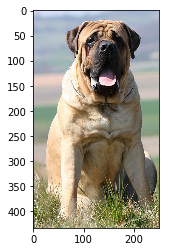


     -----     



In [26]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

Hello, it appears that you are human!


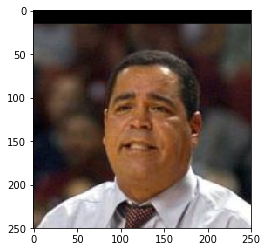

If you were a dog, you would be a Pharaoh hound!

     -----     

Hello, it appears that you are human!


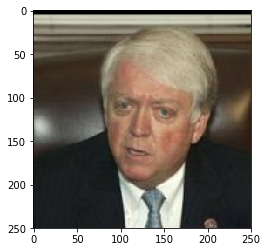

If you were a dog, you would be a Pharaoh hound!

     -----     

Hello, it appears that you are human!


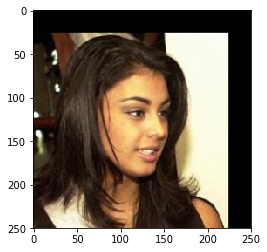

If you were a dog, you would be a Affenpinscher!

     -----     

Hello, it appears that you are human!


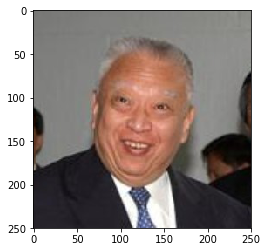

If you were a dog, you would be a Pharaoh hound!

     -----     

Hello, it appears that you are human!


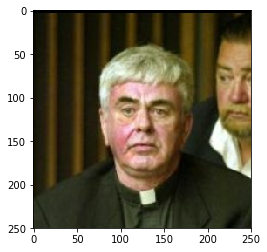

If you were a dog, you would be a Briard!

     -----     

Hello, it appears that you are a Cairn terrier!


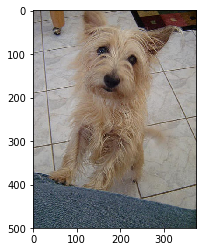


     -----     

Hello, it appears that you are a Otterhound!


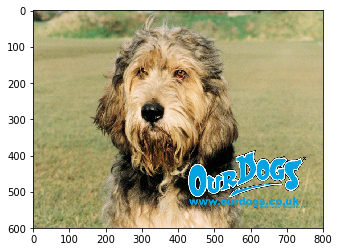


     -----     

Hello, it appears that you are a Field spaniel!


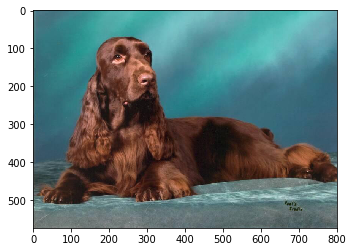


     -----     

Hello, it appears that you are a Keeshond!


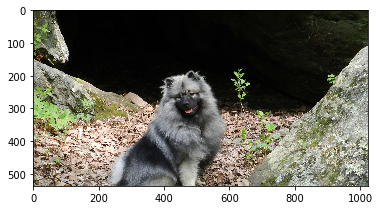


     -----     

Hello, it appears that you are a Glen of imaal terrier!


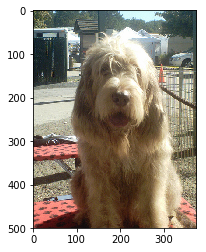


     -----     



In [27]:
import random

# Create an empty list that will be used to store paths to the
# images to be run through our breed prediction algorithm
my_image_list = []

# Add to the list the path to five human images picked at random
for i in range(0, 5):
    idx = random.randint(1, len(human_files))
    my_image_list.append(human_files[idx])

# Add to the list the path to five dog images picked at random
for i in range(0, 5):
    idx = random.randint(1, len(dog_files))
    my_image_list.append(dog_files[idx])

# Run these randomly selected images through our breed prediction algorithm
for i in my_image_list:
    run_app(i)